# 1. Small Circle inside Large Circle

El objetivo de esta sección es experimentar con algunos modelos no-lineales sobre un problema de juguete
generado para visualizar algoritmos de clustering. Se trata de un problema de clasificación a todas luces
linealmente inseparable, en el sentido que, si denotamos por $x \in \mathcal{R}^2$ un patrón de entrada y por $y \in \{0, 1\}$ su correspondiente etiqueta, no existen $w \in \mathcal{R}^2,b \in \mathcal{R}$ tal que $y(w^Tx + b) \ge \rho > 0$. El problema nos permite hacer un recorrido rápido por las grandes ideas en la búsqueda de la no linealidad.

### a. Construcción de la data de entrenamiento y prueba

In [1]:
import numpy as np
from sklearn.utils import check_random_state
from sklearn.model_selection import train_test_split

def do_circles(n=2000,noisy_n=0.05):
    generator = check_random_state(10)
    linspace = np.linspace(0, 2 * np.pi, n // 2 + 1)[:-1]
    outer_circ_x = np.cos(linspace)
    outer_circ_y = np.sin(linspace)
    inner_circ_x = outer_circ_x * .3
    inner_circ_y = outer_circ_y * .3
    X = np.vstack((np.append(outer_circ_x, inner_circ_x),
    np.append(outer_circ_y, inner_circ_y))).T
    y = np.hstack([np.zeros(n // 2, dtype=np.intp),
    np.ones(n // 2, dtype=np.intp)])
    X += generator.normal(scale=noisy_n, size=X.shape)
    X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.5, random_state=42)
    return X_train,y_train,X_test,y_test

In [71]:
import matplotlib.pyplot as plt


def plot_classifier(clf,X_train,Y_train,X_test,Y_test,model_type):
    f, axis = plt.subplots(1, 1, sharex='col', sharey='row',figsize=(12, 8))
    axis.scatter(X_train[:,0],X_train[:,1],s=30,c=Y_train,zorder=10,cmap='summer_r')
    axis.scatter(X_test[:,0],X_test[:,1],s=20,c=Y_test,zorder=10,cmap='winter_r')
    
    XX, YY = np.mgrid[-2:2:200j, -2:2:200j]
    if model_type == 'tree':
        Z = clf.predict_proba(np.c_[XX.ravel(), YY.ravel()])[:,0]
    elif model_type == 'ann':
        Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
    else: raise ValueError('model type not supported')
    Z = Z.reshape(XX.shape)
    Zplot = Z > 0.5
    axis.pcolormesh(XX, YY, Zplot ,cmap='spring')
    axis.contour(XX, YY, Z, alpha=1, colors=["k", "k", "k"], linestyles=["--", "-", "--"],
    levels=[-2, 0, 2])
    plt.show()

In [3]:
# Se obtienen los datos de entrenamiento ypruebas segun lo requerimientos especificados
X_train, Y_train, X_test, Y_test = do_circles()

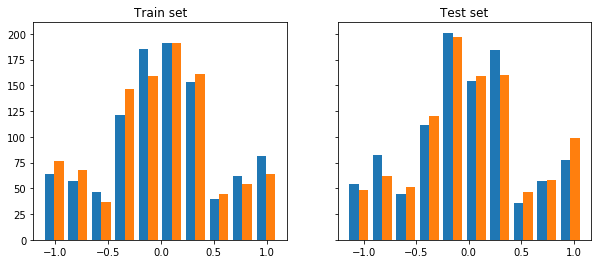

In [4]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,4))
ax1.hist(X_train)
ax2.hist(X_test)
ax1.set_title('Train set')
ax2.set_title('Test set')
f.subplots_adjust(hspace=0.3)
plt.show()

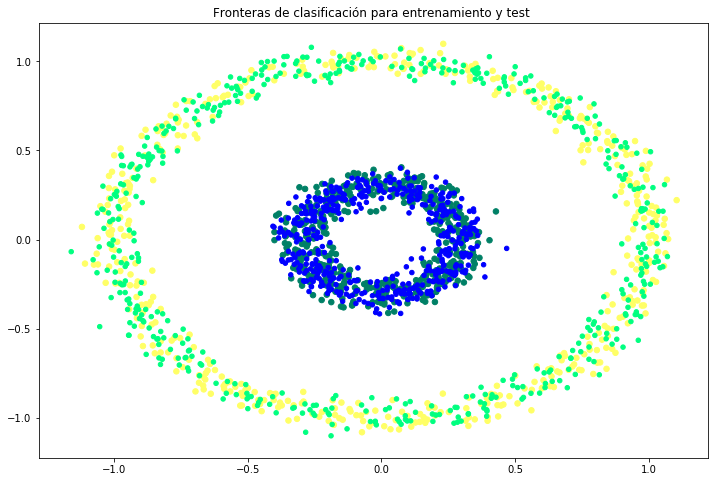

In [5]:
f, axis = plt.subplots(1, 1, sharex="col", sharey="row",figsize=(12, 8))
axis.scatter(X_train[:,0],X_train[:,1],s=30,c=Y_train,zorder=10,cmap="summer_r") #Amarillo y verde oscuro
axis.scatter(X_test[:,0],X_test[:,1],s=20,c=Y_test,zorder=10,cmap="winter_r") #verde claro y azul
axis.set_title('Fronteras de clasificación para entrenamiento y test ')
plt.show()

### b. Prueba con red neuronal - 1 neurona

A continuación se intentara resolver el problema usando solo una neurona sin capas intermedias. Se busca demostrar de forma experimental que al tener un solo nodo en nuestra "red neuronal", esta no será capaz de esolver el problema.

In [83]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

n_h=1
model = Sequential()
model.add(Dense(1, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
model.compile(optimizer=SGD(lr=1), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=50, batch_size=100, verbose=1)
scores = model.evaluate(X_test, Y_test)
test_acc = scores[1]

Epoch 1/50
1000/1000 [==============================] - 1s - loss: 7.5527 - acc: 0.0510      
Epoch 2/50
1000/1000 [==============================] - 0s - loss: 7.8596 - acc: 0.0000e+00     
Epoch 3/50
1000/1000 [==============================] - 0s - loss: 7.8596 - acc: 0.0000e+00     
Epoch 4/50
1000/1000 [==============================] - 0s - loss: 7.8596 - acc: 0.0000e+00     
Epoch 5/50
1000/1000 [==============================] - 0s - loss: 7.8596 - acc: 0.0000e+00     
Epoch 6/50
1000/1000 [==============================] - 0s - loss: 7.8596 - acc: 0.0000e+00     

Al probar con 50 epochs podemos ver que el accuracy del modelo no presenta ninguna mejora a medida que se van completando las iteraciones. 

Se medira nuevamente el desempeño pero esta vez modificaremos algunos de los parametros, para ver si hay algún cambio y comprobar si efectivamente esta unica neurona es incapaz de entregar un accuracy distinto de 0.

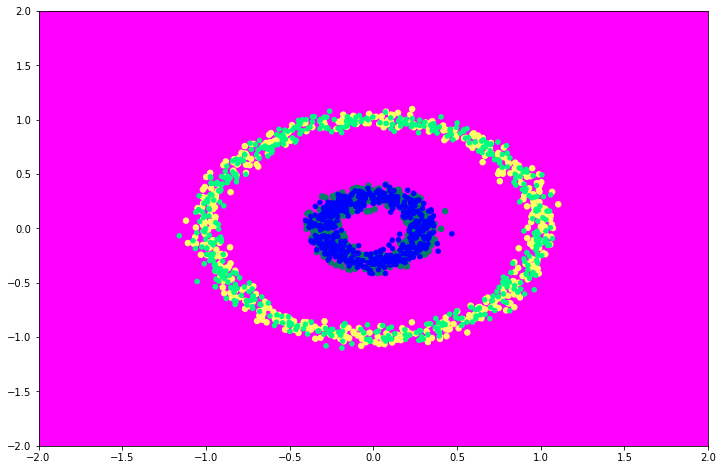

In [86]:
plot_classifier(model,X_train,Y_train,X_test,Y_test,model_type="ann")

In [87]:
model = Sequential()
model.add(Dense(1, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.compile(optimizer=SGD(lr=1), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=50, batch_size=100, verbose=1)
scores = model.evaluate(X_test, Y_test)
test_acc = scores[1]

Epoch 1/50
1000/1000 [==============================] - 1s - loss: 7.6671 - acc: 0.0440      
Epoch 2/50
1000/1000 [==============================] - 0s - loss: 7.8596 - acc: 0.0000e+00     
Epoch 3/50
1000/1000 [==============================] - 0s - loss: 7.8596 - acc: 0.0000e+00     
Epoch 4/50
1000/1000 [==============================] - 0s - loss: 7.8596 - acc: 0.0000e+00     
Epoch 5/50
1000/1000 [==============================] - 0s - loss: 7.8596 - acc: 0.0000e+00     
Epoch 6/50
1000/1000 [==============================] - 0s - loss: 7.8596 - acc: 0.0000e+00     

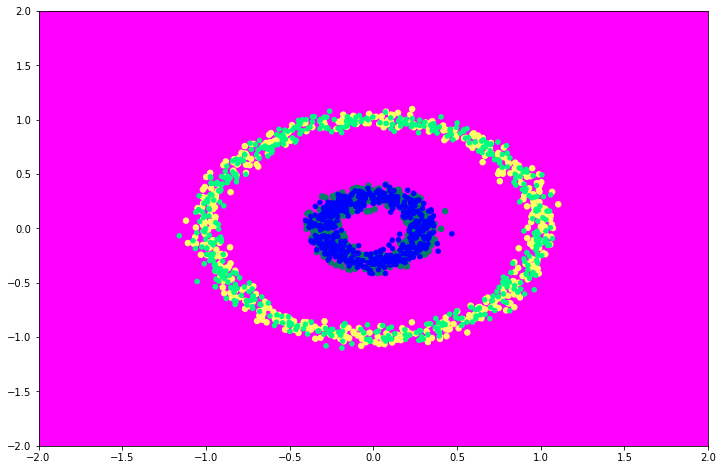

In [88]:
plot_classifier(model,X_train,Y_train,X_test,Y_test,model_type="ann")

### c. Red neuronal con 1 capa oculta

In [9]:
def scores(ep,n_h,X_train, Y_train,X_test, Y_test):
    sc_tr = []
    sc_ts = []
    for i in range(len(n_h)):
        model = Sequential()
        model.add(Dense(n_h[i], input_dim=X_train.shape[1], kernel_initializer= "uniform", activation="relu"))
        model.add(Dense(1, kernel_initializer="uniform", activation="sigmoid"))
        model.compile(optimizer=SGD(lr=1), loss="binary_crossentropy", metrics=["accuracy"])
        model.fit(X_train, Y_train, epochs=ep, batch_size=50, verbose=False)
        score1 = model.evaluate(X_train, Y_train)
        score2 = model.evaluate(X_test, Y_test)
        sc_tr.append(score1[0])
        sc_ts.append(score2[0])
    return sc_tr,sc_ts

In [10]:
# Se probara con distintos valores de neuronas
n_h=[2,4,8,16,32]
# Se probara con diferentes valores para el parametro epochs
ep = [10,25,50]

In [11]:
l_sc_train = []
l_sc_test = []
for i in range(len(ep)):
    sc1, sc2 = scores(ep[i],n_h,X_train, Y_train,X_test, Y_test)
    l_sc_train.append(sc1)
    l_sc_test.append(sc2)

 672/1000 [===================>..........] - ETA: 0s 

A continuación se presenta la grafica del error obtenido para la red neuronal con ditinta cantidad de neuronas en el primer nivel y diferentes valores en el parametro epochs

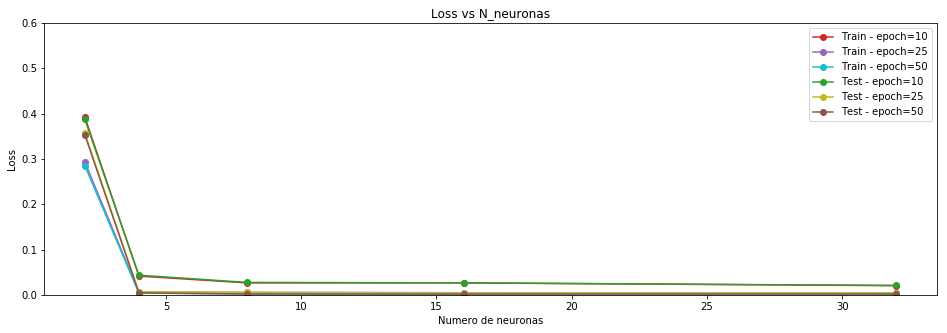

In [13]:
plt.figure(figsize=(16,5))
plt.xlabel("Numero de neuronas")
plt.ylim((0,.6))
plt.ylabel("Loss")
plt.title("Loss vs N_neuronas")
plt.plot(n_h,l_sc_train[0], '-o',label= "Train - epoch=10",color="tab:red")
plt.plot(n_h,l_sc_train[1], '-o',label= "Train - epoch=25",color="tab:purple")
plt.plot(n_h,l_sc_train[2], '-o',label= "Train - epoch=50",color="tab:cyan")
plt.plot(n_h,l_sc_test[0], '-o',label= "Test - epoch=10",color="tab:green")
plt.plot(n_h,l_sc_test[1], '-o',label= "Test - epoch=25",color="tab:olive")
plt.plot(n_h,l_sc_test[2], '-o',label= "Test - epoch=50",color="tab:brown")
plt.legend(loc = "best")
plt.show()

Como podemos ver, a medida que aumentamos la cantidad de neuronas el error en el resultado de la prediccion disminuye drasticamente en este modelo de dos capas. Podemos notar que a partir de las 2 neuronas en la primera capa el error tiende a ser cero.

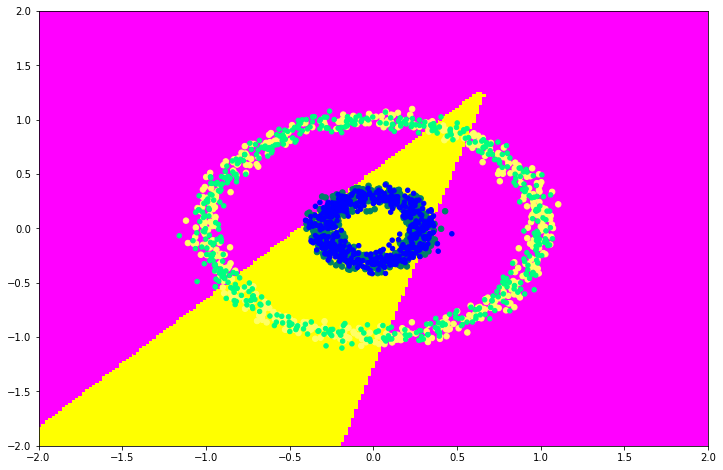

In [90]:
model3 = Sequential()
model3.add(Dense(2, input_dim=X_train.shape[1], kernel_initializer= "uniform", activation="relu"))
model3.add(Dense(1, kernel_initializer="uniform", activation="sigmoid"))
model3.compile(optimizer=SGD(lr=1), loss="binary_crossentropy", metrics=["accuracy"])
model3.fit(X_train, Y_train, epochs=50, batch_size=50, verbose=False)
plot_classifier(model3,X_train,Y_train,X_test,Y_test,model_type="ann")

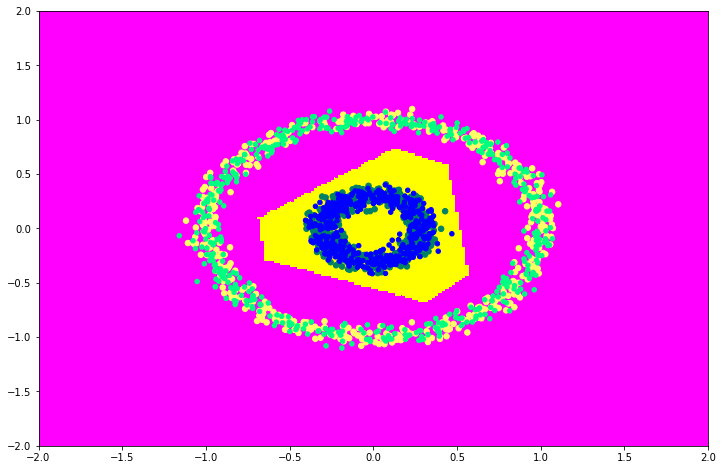

In [98]:
model4 = Sequential()
model4.add(Dense(4, input_dim=X_train.shape[1], kernel_initializer= "uniform", activation="relu"))
model4.add(Dense(1, kernel_initializer="uniform", activation="sigmoid"))
model4.compile(optimizer=SGD(lr=1), loss="binary_crossentropy", metrics=["accuracy"])
model4.fit(X_train, Y_train, epochs=10, batch_size=50, verbose=False)
plot_classifier(model3,X_train,Y_train,X_test,Y_test,model_type="ann")

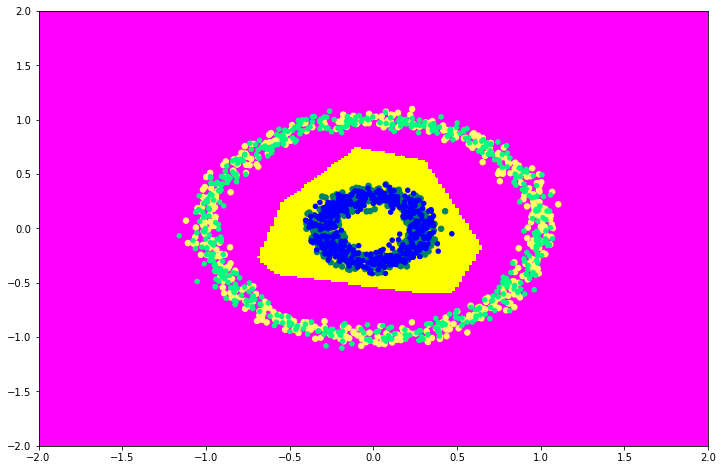

In [99]:
model5 = Sequential()
model5.add(Dense(32, input_dim=X_train.shape[1], kernel_initializer= "uniform", activation="relu"))
model5.add(Dense(1, kernel_initializer="uniform", activation="sigmoid"))
model5.compile(optimizer=SGD(lr=1), loss="binary_crossentropy", metrics=["accuracy"])
model5.fit(X_train, Y_train, epochs=50, batch_size=50, verbose=False)
plot_classifier(model4,X_train,Y_train,X_test,Y_test,model_type="ann")

### d.  Árbol de clasificación de 1 nivel

In [20]:
from sklearn.tree import DecisionTreeClassifier as Tree

clf=Tree(criterion="gini",splitter="best",random_state=0,max_depth=1)
clf.fit(X_train,Y_train)
y = clf.predict(X_test)
mse = np.mean(np.power(y - Y_test, 2))
acc_test = clf.score(X_test,Y_test)

print("Profundidad del arbol", clf.tree_.max_depth)
print("Test Accuracy = ",acc_test)
print("Test Mse", mse)

Profundidad del arbol 1
Test Accuracy =  0.67
Test Mse 0.33


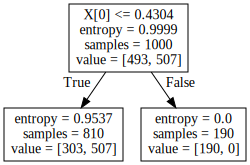

In [25]:
from sklearn import tree
import graphviz 

dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data)
dot_data = tree.export_graphviz(clf, out_file=None,   
                         filled=True, rounded=True,  
                         special_characters=True)

graph

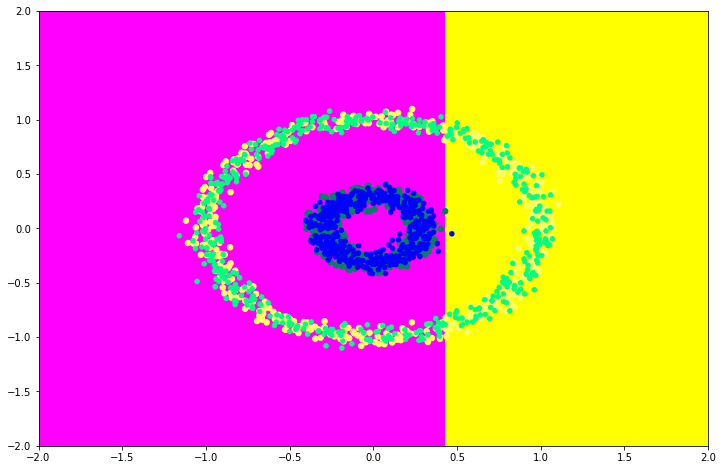

In [84]:
plot_classifier(clf,X_train,Y_train,X_test,Y_test,model_type="tree")

In [103]:
clf1=Tree(criterion="entropy",splitter="best",random_state=0,max_depth=1)
clf1.fit(X_train,Y_train)
y = clf1.predict(X_test)
mse = np.mean(np.power(y - Y_test, 2))
acc_test = clf1.score(X_test,Y_test)

print("Profundidad del arbol", clf1.tree_.max_depth)
print("Test Accuracy = ",acc_test)
print("Test Mse", mse)

Profundidad del arbol 1
Test Accuracy =  0.658
Test Mse 0.342


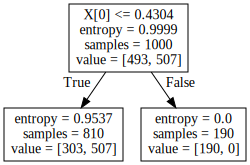

In [104]:
import graphviz 

dot_data = tree.export_graphviz(clf1, out_file=None) 
graph = graphviz.Source(dot_data)
dot_data = tree.export_graphviz(clf1, out_file=None,   
                         filled=True, rounded=True,  
                         special_characters=True)

graph

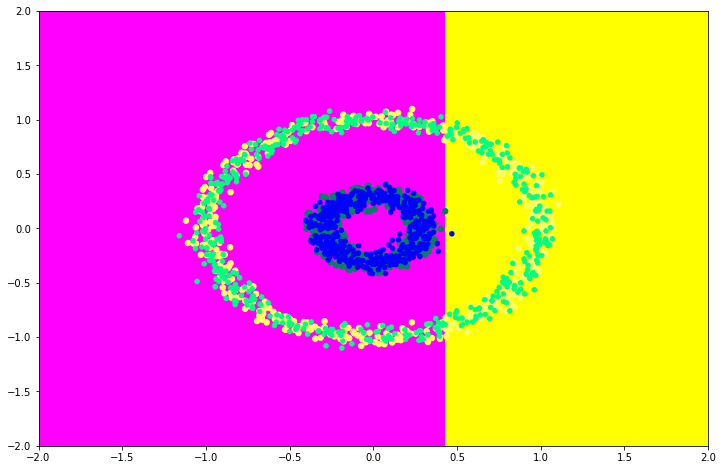

In [102]:
plot_classifier(clf1,X_train,Y_train,X_test,Y_test,model_type="tree")

### e. Árbol de clasificación con multiples niveles

In [110]:
def mse_tree(max_depth,min_depth):
    l_test = []
    l_train = []
    score = []
    for i in range(max_depth,min_depth+1):
        clf=Tree(criterion="gini",splitter="best",random_state=0,max_depth=i)
        clf.fit(X_train,Y_train)
        # score
        score.append(clf.score(X_test,Y_test))
        # prediccion conjunto de entrenamiento
        ypred_train = clf.predict(X_train)
        msetr = np.mean(np.power(ypred_train - Y_train, 2))
        l_train.append(msetr)
        # prediccion conjunto de pruebas
        ypred_test = clf.predict(X_test)
        msets = np.mean(np.power(ypred_test - Y_test, 2))
        l_test.append(msets)
    return l_train, l_test, score

mse_train, mse_test, tree_score = mse_tree(2,20)

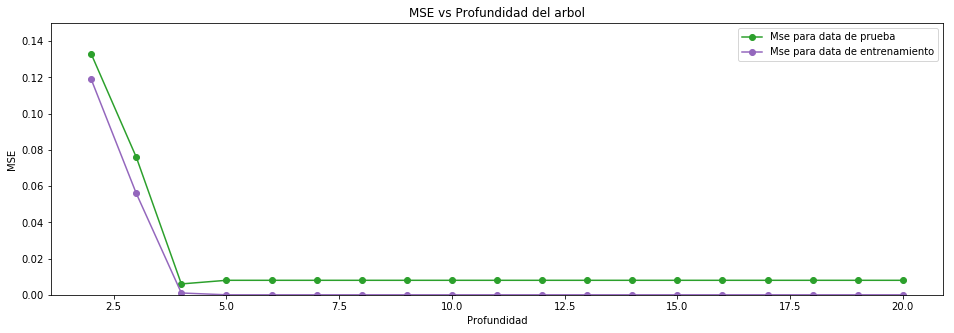

In [111]:
N_t = np.arange(2,21)
plt.figure(figsize=(16,5))
plt.xlabel("Profundidad")
plt.ylim((0,.15))
plt.ylabel("MSE")
plt.title("MSE vs Profundidad del arbol")
plt.plot(N_t,mse_test, '-o',label= "Mse para data de prueba",color="tab:green")
plt.plot(N_t,mse_train, '-o',label= "Mse para data de entrenamiento",color="tab:purple")
plt.legend(loc = "best")
plt.show()

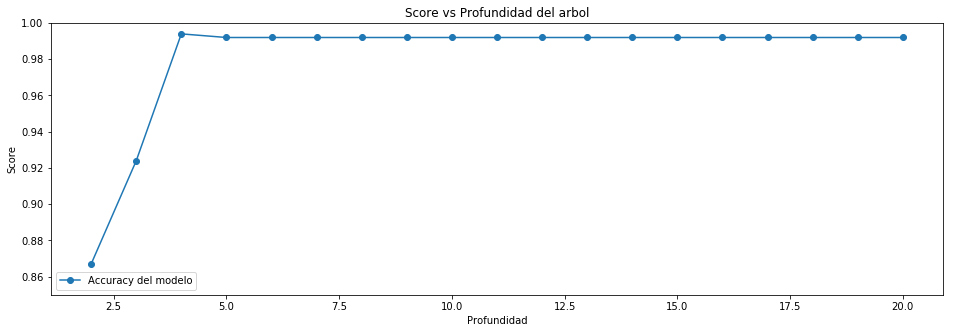

In [29]:
N_t = np.arange(2,21)
plt.figure(figsize=(16,5))
plt.xlabel("Profundidad")
plt.ylim((0.85,1))
plt.ylabel("Score")
plt.title("Score vs Profundidad del arbol")
plt.plot(N_t, tree_score, '-o', label = "Accuracy del modelo")
plt.legend(loc = "best")
plt.show()

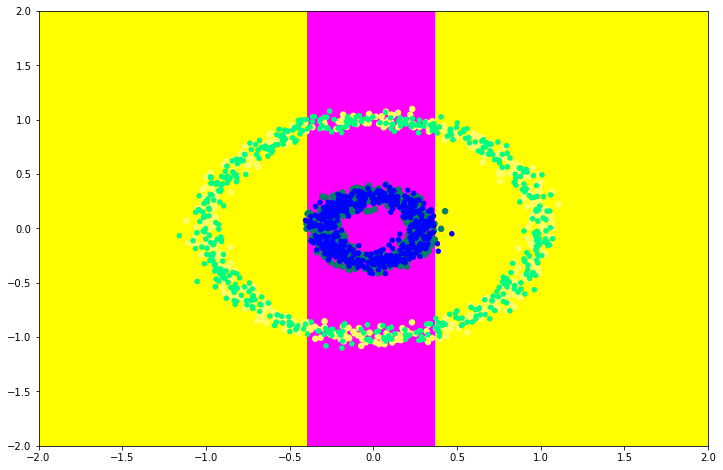

In [114]:
clf2=Tree(criterion="gini",splitter="best",random_state=0,max_depth=2)
clf2.fit(X_train,Y_train)
plot_classifier(clf2,X_train,Y_train,X_test,Y_test,model_type="tree")

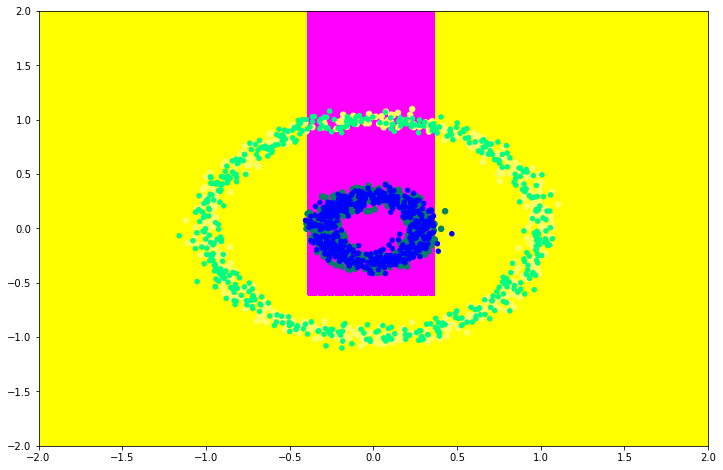

In [116]:
clf3=Tree(criterion="gini",splitter="best",random_state=0,max_depth=3)
clf3.fit(X_train,Y_train)
plot_classifier(clf3,X_train,Y_train,X_test,Y_test,model_type="tree")

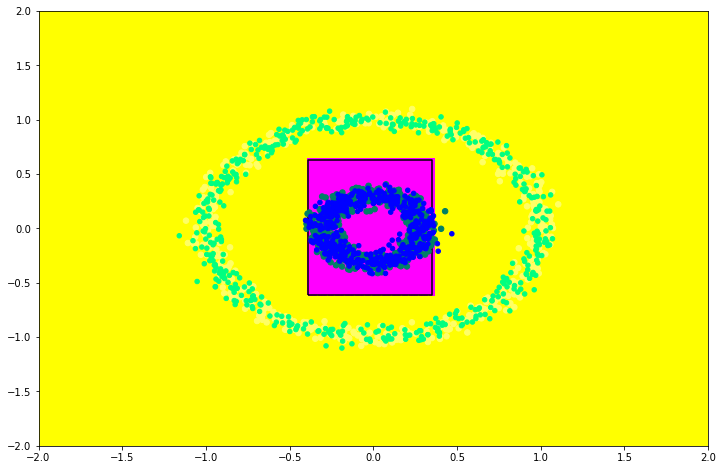

In [120]:
clf4=Tree(criterion="gini",splitter="best",random_state=0,max_depth=4)
clf4.fit(X_train,Y_train)
plot_classifier(clf4,X_train,Y_train,X_test,Y_test,model_type="tree")

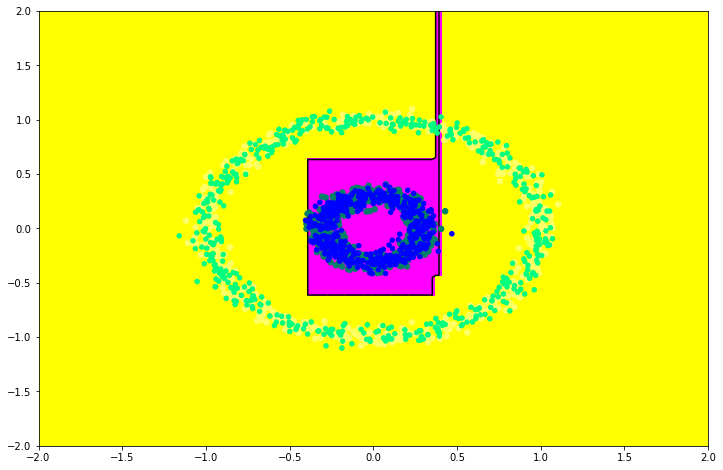

In [124]:
clf20=Tree(criterion="gini",splitter="best",random_state=0,max_depth=20)
clf20.fit(X_train,Y_train)
plot_classifier(clf20,X_train,Y_train,X_test,Y_test,model_type="tree")

### f. Proyección de la data usando kernelPCA

In [66]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=2,kernel="rbf", gamma=5)
kpca = kpca.fit(X_train)
Xkpca_train = kpca.transform(X_train)
Xkpca_test = kpca.transform(X_test)

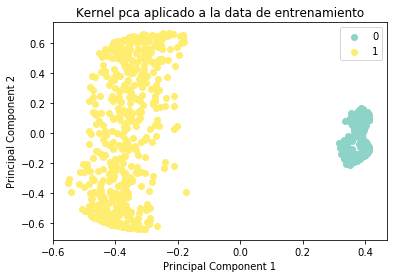

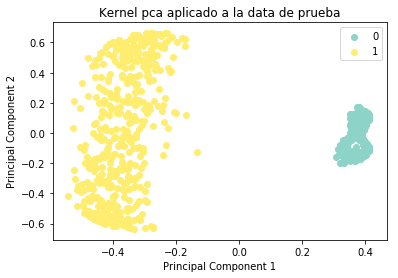

In [68]:
cmap = plt.cm.get_cmap("Set3")
mclasses = (0,1)
mcolors = [cmap(i) for i in np.linspace(0,1,2)]
for lab, col in zip(mclasses,mcolors):
    plt.scatter(Xkpca_train[Y_train==lab, 0], Xkpca_train[Y_train==lab, 1],label=lab,c=col, marker='o')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("Kernel pca aplicado a la data de entrenamiento")
leg = plt.legend(loc='upper right', fancybox=True)
plt.show()

for lab, col in zip(mclasses,mcolors):
    plt.scatter(Xkpca_test[Y_test==lab, 0], Xkpca_test[Y_test==lab, 1],label=lab,c=col, marker='o')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("Kernel pca aplicado a la data de prueba")
leg = plt.legend(loc='upper right', fancybox=True)
plt.show()


### e. Clasificador lineal en datos proyectados por kernel PCA